# Vehicle Dataset Preprocessing

## Objectives
1. Examine data quality (Missing values, structure).
2. Detect and treat outliers (IQR and Winsorization).
3. Perform feature scaling (Standardization).
4. Visualize distributions.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

# 1. Examine data quality in the vehicle dataset
df = pd.read_csv('ML470_S7_Vehicle_Data_Practice.csv')

print("Dataset Structure:")
df.info()

print("First few rows:")
display(df.head())

print("Missing values per column:")
print(df.isnull().sum())

# Remove incomplete records
df_clean = df.dropna().copy()
print(f"Shape after removing missing values: {df_clean.shape}")

# Select only numerical columns for preprocessing
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numeric_cols)}")

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(4)
memory usage

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


Missing values per column:
Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64
Shape after removing missing values: (152, 15)
Numerical columns: ['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']


## 2. Visualizing Distributions (Boxplot)
Creating the boxplot of numerical features to detect outliers.

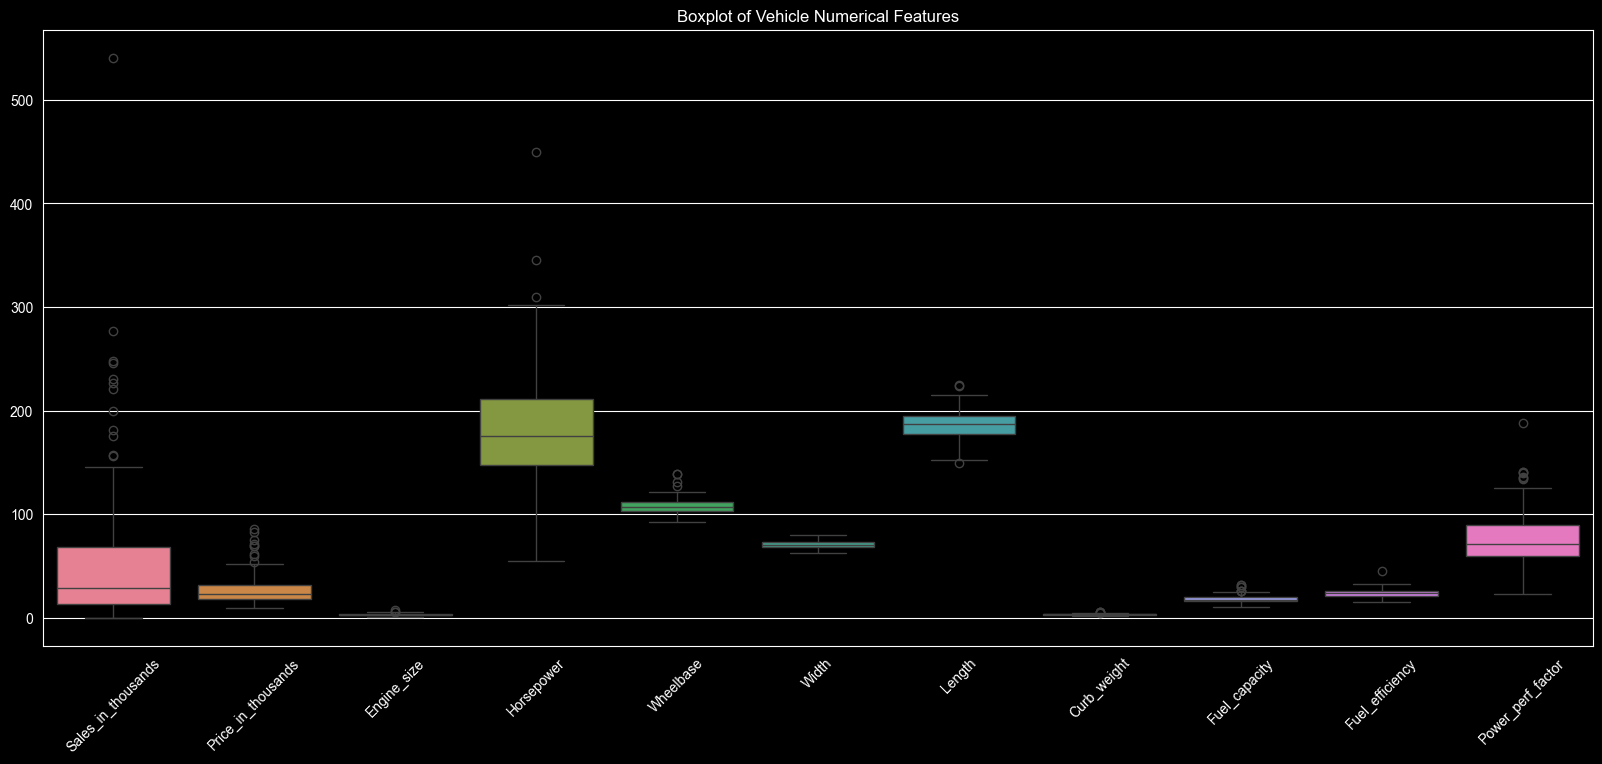

In [3]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_clean[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Vehicle Numerical Features')
plt.show()

## 3. Detect and Treat Outliers
Identifying outliers using IQR and applying Winsorization.

In [4]:
# Detect outliers using IQR method
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    print(f"Outliers detected in {col}: {outliers_count}")

# Apply Winsorization to cap extreme values (5th and 95th percentiles)
for col in numeric_cols:
    df_clean[col] = winsorize(df_clean[col], limits=[0.05, 0.05])

print("Winsorization applied to numerical columns.")

Outliers detected in Sales_in_thousands: 12
Outliers detected in Price_in_thousands: 9
Outliers detected in Engine_size: 3
Outliers detected in Horsepower: 3
Outliers detected in Wheelbase: 4
Outliers detected in Width: 0
Outliers detected in Length: 3
Outliers detected in Curb_weight: 4
Outliers detected in Fuel_capacity: 7
Outliers detected in Fuel_efficiency: 1
Outliers detected in Power_perf_factor: 7
Winsorization applied to numerical columns.


## 4. Feature Scaling
Standardizing 'Width' and 'Length'.

In [5]:
scaler = StandardScaler()
df_clean[['Width', 'Length']] = scaler.fit_transform(df_clean[['Width', 'Length']])

print("Standardized Width and Length (first 5 rows):")
display(df_clean[['Width', 'Length']].head())

print("Preprocessed dataset is now ready for clustering or further analysis.")

Standardized Width and Length (first 5 rows):


,Width,Length
0,-1.142897,-1.208424
1,-0.237317,0.489790
3,0.094728,0.796297
4,-0.871223,-0.744522
5,1.513470,0.415234


Preprocessed dataset is now ready for clustering or further analysis.
